In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import scipy.stats

In [2]:
dataset=pd.read_csv("kidney_disease.csv")
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
dataset.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
dataset.isnull().sum(axis=0) #gives total number of null values in each column

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
dataset.classification.unique() #gives the unique values in each column

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [8]:
dataset.rc.unique() 

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [9]:
dataset.pcv.unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [10]:
dataset.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [11]:
dataset.dm .unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [12]:
dataset. cad  .unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [13]:
dataset.classification=dataset.classification.replace("ckd\t","ckd") #replacing all irregularities to get classification type of data
dataset.rc=dataset.rc.replace('\t?',"5.2") 
dataset.pcv=dataset.pcv.replace('\t43',"43") 
dataset.pcv=dataset.pcv.replace('\t?',"52") 
dataset.wc=dataset.wc.replace('\t8400',"8400") 
dataset.wc=dataset.wc.replace('\t6200',"6200") 
dataset.wc=dataset.wc.replace('\t?',"9800") 
dataset.dm=dataset.dm.replace('\tno',"no") 
dataset.dm=dataset.dm.replace('\tyes','yes') 
dataset.dm=dataset.dm.replace(' yes','yes') 
dataset.cad=dataset.cad.replace('\tno',"no") 

In [14]:
dataset['rbc'] = dataset.rbc.replace(['normal','abnormal'], ['1', '0']) #encoding data to numerical values
dataset['pc'] = dataset.pc.replace(['normal','abnormal'], ['1', '0'])
dataset['pcc'] = dataset.pcc.replace(['present','notpresent'], ['1', '0'])
dataset['ba'] = dataset.ba.replace(['present','notpresent'], ['1', '0'])
dataset['htn'] = dataset.replace(['yes','no'], ['1', '0'])
dataset['dm'] = dataset.dm.replace(['yes','no'], ['1', '0'])
dataset['cad'] = dataset.cad.replace(['yes','no'], ['1', '0'])
dataset['appet'] = dataset.appet.replace(['good','poor'], ['1', '0'])
dataset['pe'] = dataset.pe.replace(['yes','no'], ['1', '0'])
dataset['ane'] = dataset.ane.replace(['yes','no'], ['1', '0'])
dataset['classification']=dataset.classification.replace(['ckd','notckd'],['1','0'])

In [15]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,...,44,7800,5.2,0,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,...,38,6000,NaN,1,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31,7500,NaN,2,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,3,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35,7300,4.6,4,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47,6700,4.9,395,0,0,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54,7800,6.2,396,0,0,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49,6600,5.4,397,0,0,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51,7200,5.9,398,0,0,1,0,0,0


In [16]:
dataset.rc=dataset.rc.astype(float) #converting data type to float for ease of modification
dataset.rbc=dataset.rbc.astype(float)
dataset.pc=dataset.pc.astype(float)
dataset.pcc=dataset.pcc.astype(float)
dataset.ba=dataset.ba.astype(float)
dataset.pcv=dataset.pcv.astype(float)
dataset.wc=dataset.wc.astype(float)
dataset.htn=dataset.htn.astype(float)
dataset.dm=dataset.dm.astype(float)
dataset.cad=dataset.cad.astype(float)
dataset.appet=dataset.appet.astype(float)
dataset.pe=dataset.pe.astype(float)
dataset.ane=dataset.ane.astype(float)
dataset.classification=dataset.classification.astype(float)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    float64
 17  wc              295 non-null    flo

In [18]:
dataset=dataset.drop(['id'],axis=1)
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,2.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,3.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,4.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,395.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,396.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,397.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,398.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
dataset['age'].fillna((dataset['age'].mean()),inplace=True)
dataset['bp'].fillna((dataset['bp'].mean()),inplace=True)
dataset['sg'].fillna((dataset['sg'].mean()),inplace=True)
dataset['al'].fillna((dataset['al'].mean()),inplace=True)
dataset['su'].fillna((dataset['su'].mean()),inplace=True)
dataset['bgr'].fillna((dataset['bgr'].mean()),inplace=True)
dataset['bu'].fillna((dataset['bu'].mean()),inplace=True)
dataset['sc'].fillna((dataset['sc'].mean()),inplace=True)
dataset['sod'].fillna((dataset['sod'].mean()),inplace=True)
dataset['pot'].fillna((dataset['pot'].mean()),inplace=True)
dataset['hemo'].fillna((dataset['hemo'].mean()),inplace=True)
dataset['pcv'].fillna((dataset['pcv'].mean()),inplace=True)
dataset['wc'].fillna((dataset['wc'].mean()),inplace=True)
dataset['rc'].fillna((dataset['rc'].mean()),inplace=True)

In [20]:
dataset.mode()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,60.0,80.0,1.02,0.0,0.0,1.0,1.0,0.0,0.0,148.036517,...,38.924242,8410.847458,4.709259,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,395.0,NaN,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,397.0,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,398.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dataset['rbc'].fillna(1,inplace=True) #replacing directly by mode values in case of classification data types
dataset['pc'].fillna(1,inplace=True)
dataset['pcc'].fillna(0,inplace=True)
dataset['ba'].fillna(0,inplace=True)
dataset['dm'].fillna(0,inplace=True)
dataset['cad'].fillna(0,inplace=True)
dataset['appet'].fillna(1,inplace=True)
dataset['pe'].fillna(0,inplace=True)
dataset['ane'].fillna(0,inplace=True)
dataset['classification'].fillna(1,inplace=True)

In [22]:
dataset.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

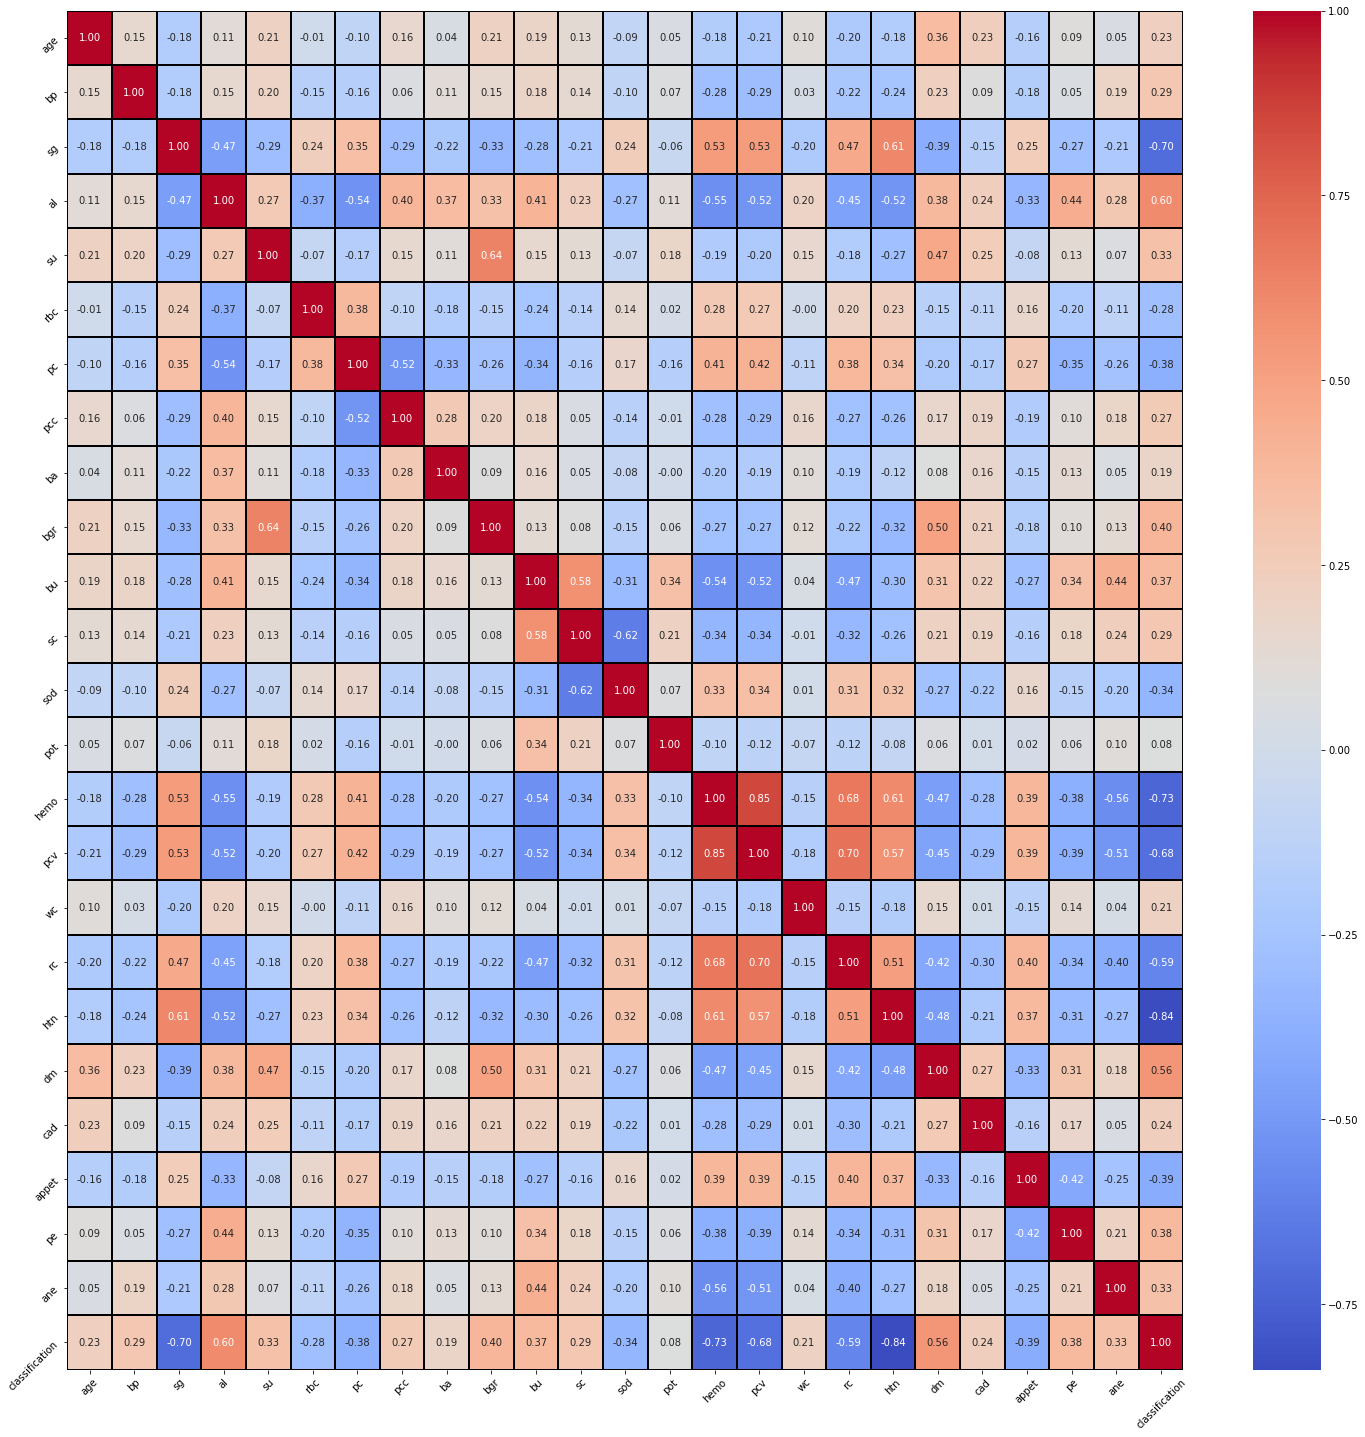

In [23]:
f,ax=plt.subplots(figsize=(25,25))
sns.heatmap(dataset.corr(),annot=True,fmt=".2f",ax=ax,linewidths=1,linecolor="black",cmap='coolwarm')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

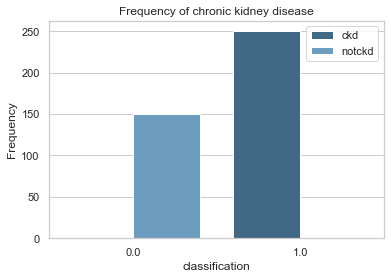

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


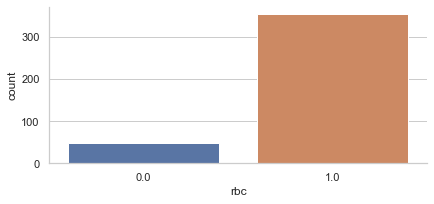

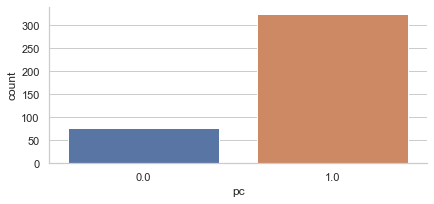

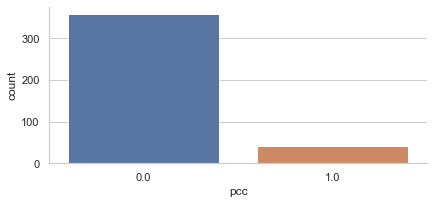

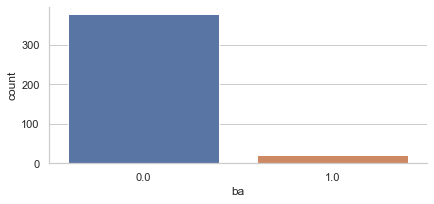

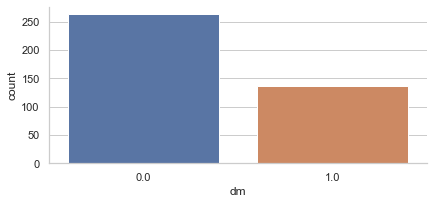

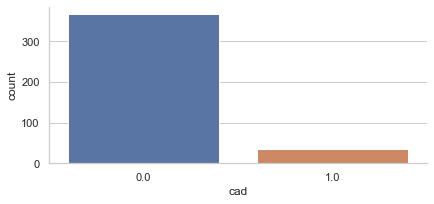

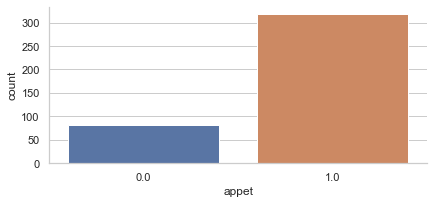

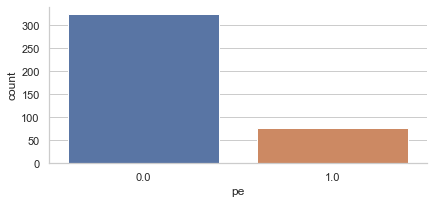

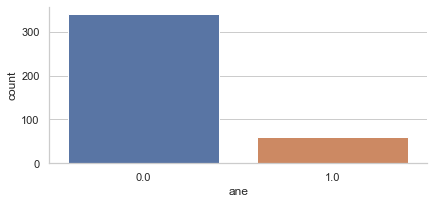

In [24]:
sns.set(style='whitegrid')
ax=sns.barplot(x=dataset['classification'].value_counts().index,y=dataset['classification'].value_counts().values,palette="Blues_d",hue=['ckd','notckd'])
plt.legend(loc=0)
plt.xlabel('classification')
plt.ylabel('Frequency')
plt.title('Frequency of chronic kidney disease')
plt.show()
sns.factorplot(data=dataset, x='rbc', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='pc', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='pcc', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='ba', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='dm', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='cad', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='appet', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='pe', kind= 'count',size=3,aspect=2)
sns.factorplot(data=dataset, x='ane', kind= 'count',size=3,aspect=2)

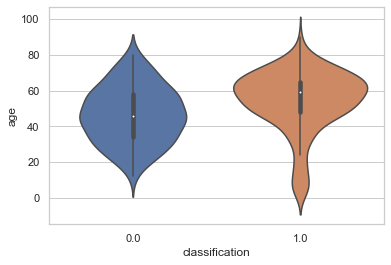

In [25]:
sns.violinplot(x=dataset['classification'],y=dataset['age'])
plt.show()

Text(0.5, 1.0, 'age v/s chronic kidney disease')

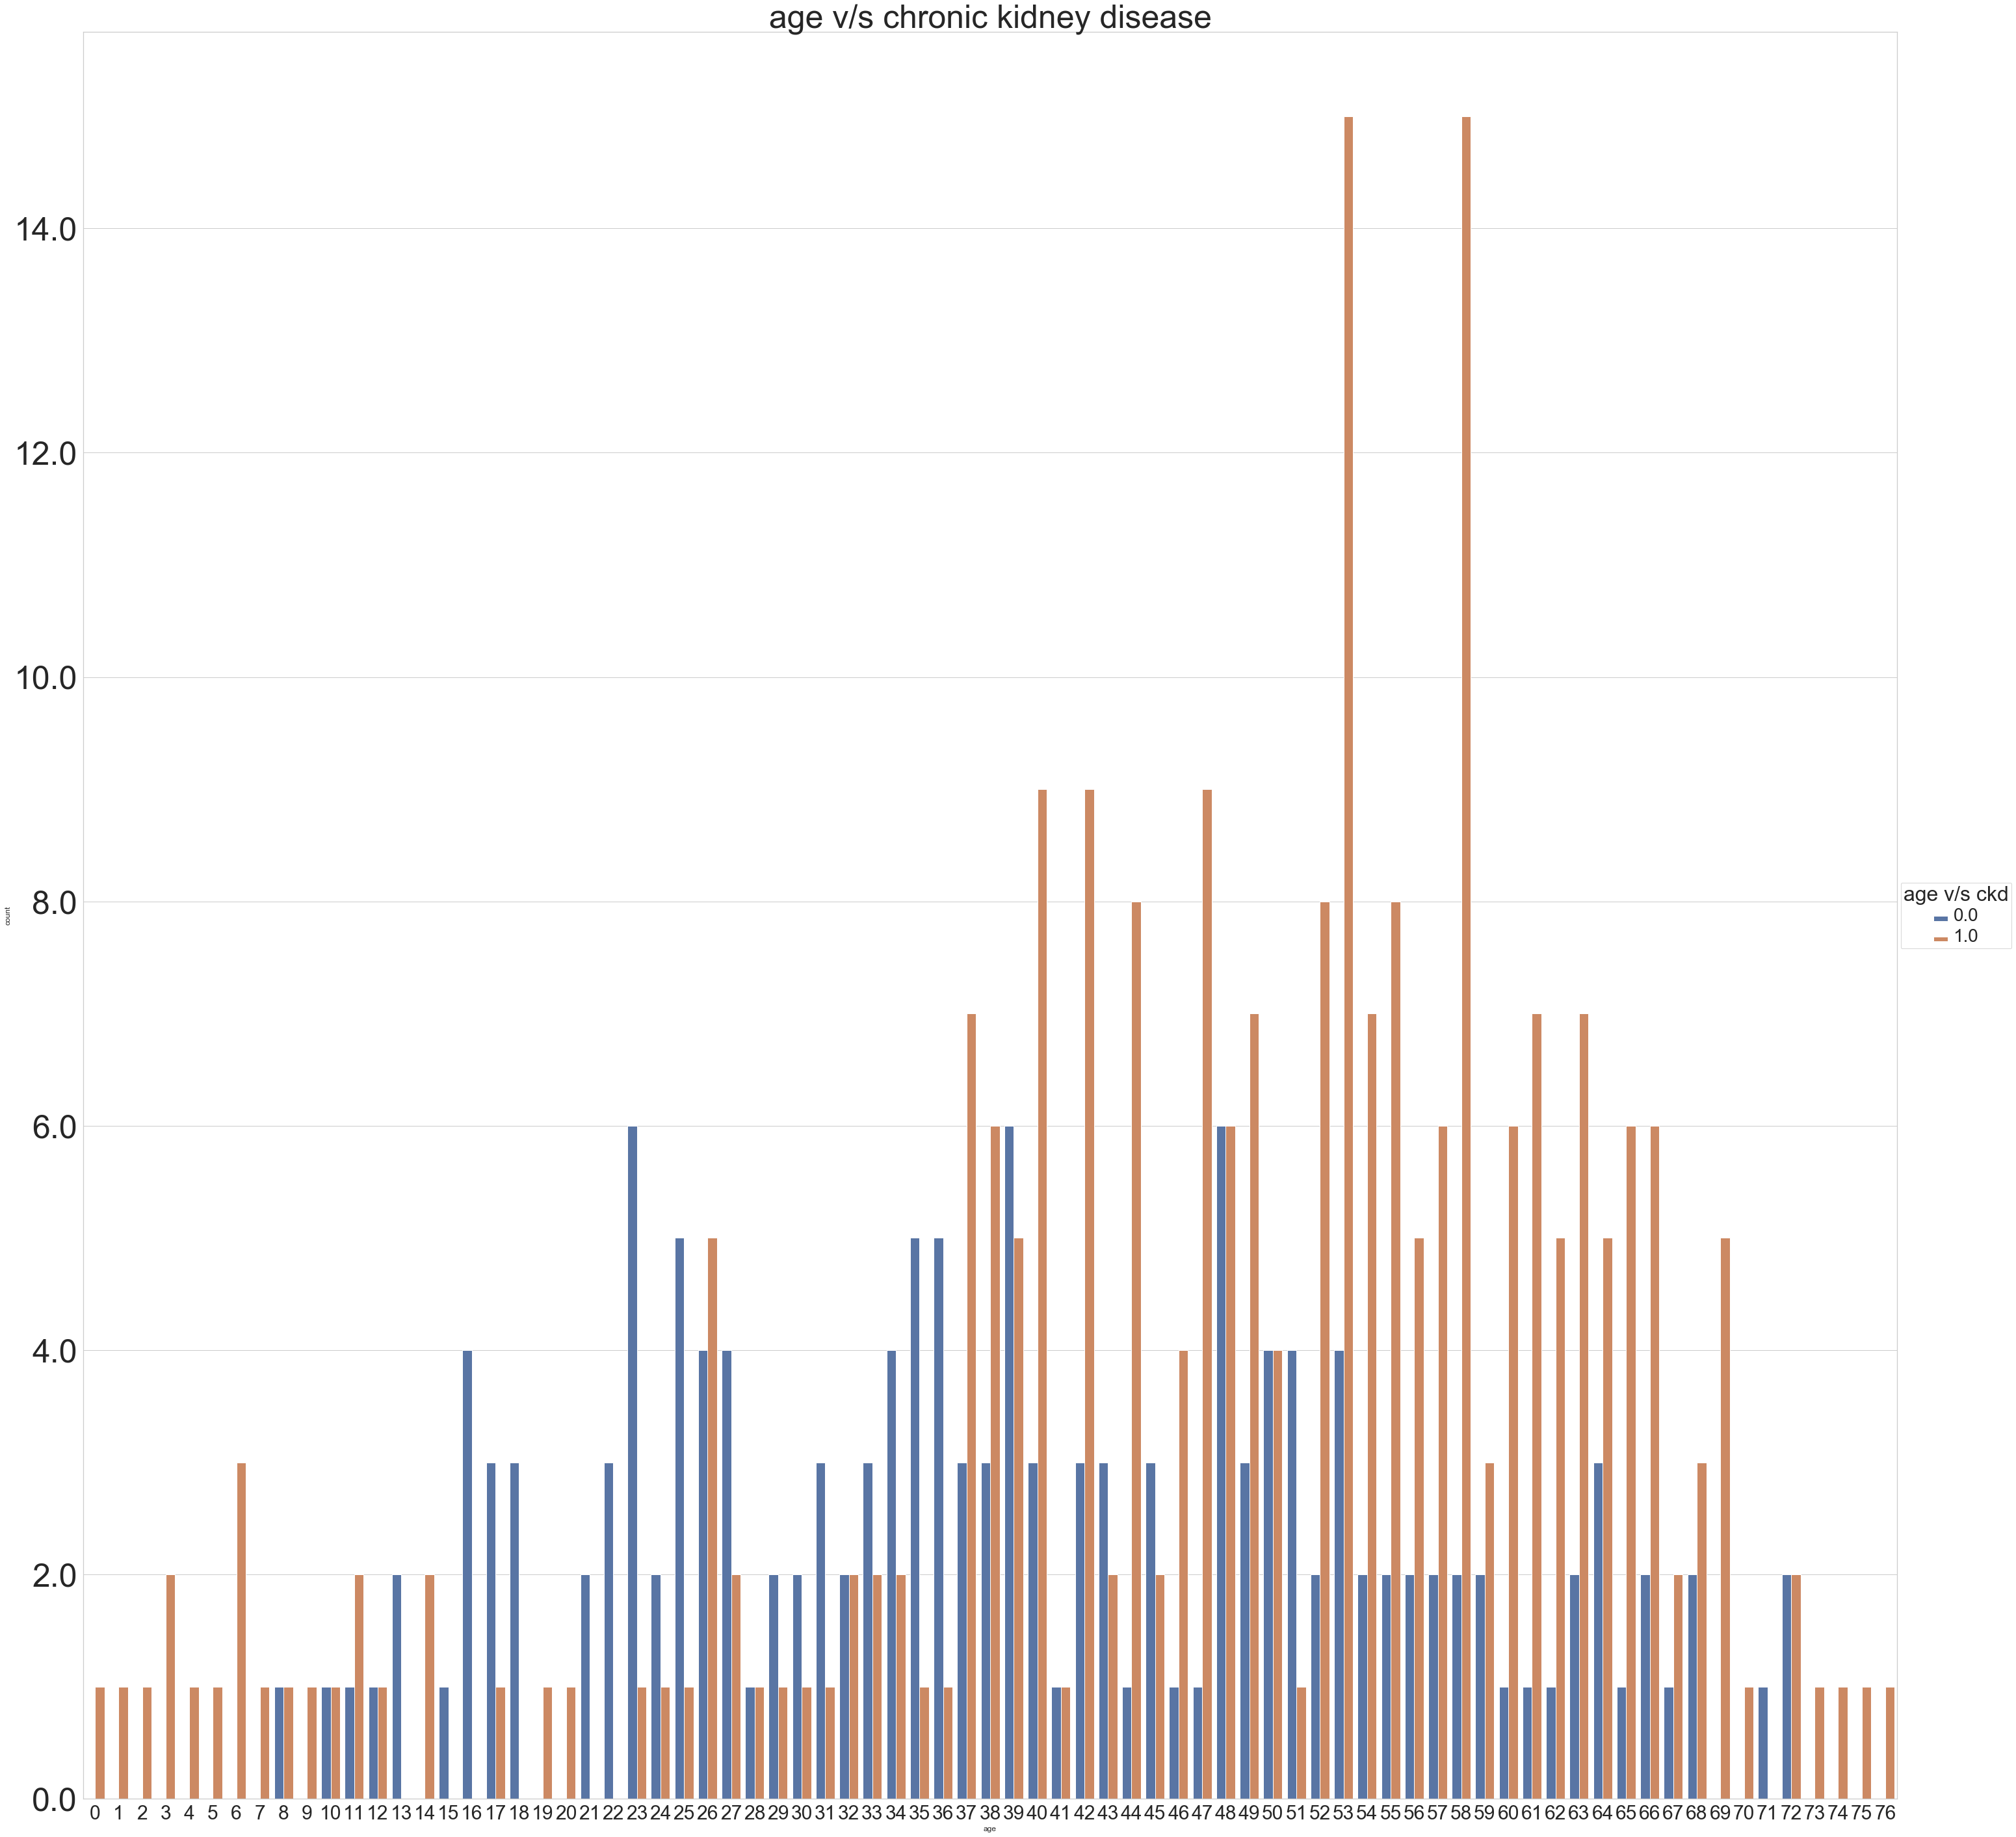

In [26]:
plt.figure(figsize=(50,50))
b=sns.countplot(x = 'age', hue = 'classification', data = dataset)
b.set_yticklabels(b.get_yticks(), size = 50)
b.set_xticklabels(b.get_xticks(), size = 30)
b.legend(title = 'age v/s ckd', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.setp(b.get_legend().get_texts(), fontsize='28') 
plt.setp(b.get_legend().get_title(), fontsize='32') 
b.axes.set_title('age v/s chronic kidney disease',fontsize=50)

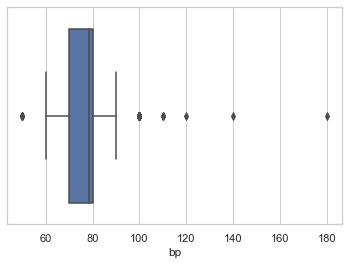

In [27]:
sns.set(style='whitegrid')
sns.boxplot(dataset['bp'])
plt.show()

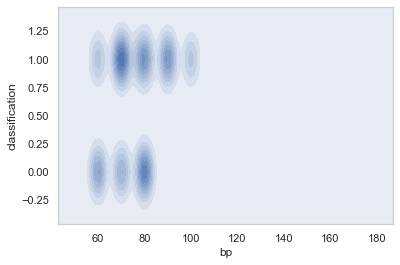

In [28]:
sns.kdeplot(dataset['bp'],dataset['classification'],shade=True)
plt.show()

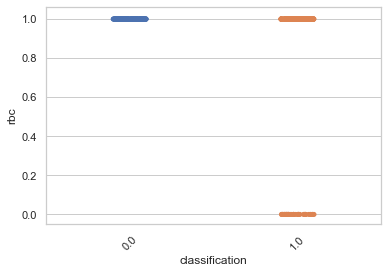

In [29]:
sns.stripplot(x=dataset['classification'],y=dataset['rbc'])
plt.xticks(rotation=45)
plt.show()

In [30]:
dataset['rbc'].value_counts()


1.0    353
0.0     47
Name: rbc, dtype: int64

In [31]:
dataset['rbc'].value_counts(normalize=True)

1.0    0.8825
0.0    0.1175
Name: rbc, dtype: float64

Text(0.5, 1.0, 'rbc v/s chronic kidney disease')

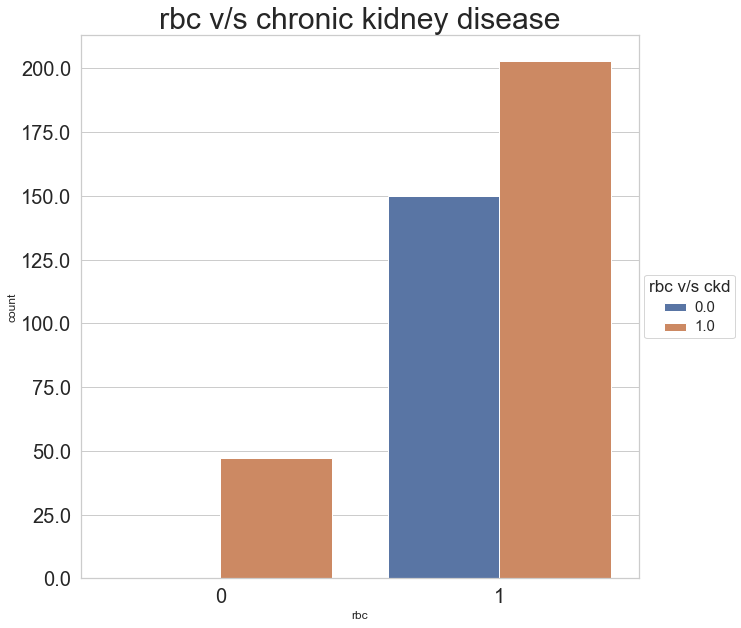

In [32]:
plt.figure(figsize=(10,10))
b=sns.countplot(x = 'rbc', hue = 'classification', data = dataset)
b.set_yticklabels(b.get_yticks(), size = 20)
b.set_xticklabels(b.get_xticks(), size = 20)
b.legend(title = 'rbc v/s ckd', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.setp(b.get_legend().get_texts(), fontsize='15') 
plt.setp(b.get_legend().get_title(), fontsize='17') 
b.axes.set_title('rbc v/s chronic kidney disease',fontsize=30)

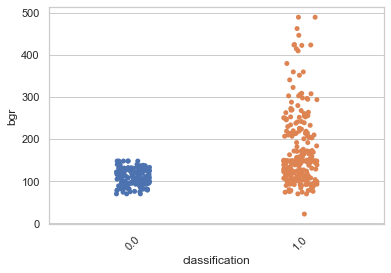

In [33]:
sns.stripplot(x=dataset['classification'],y=dataset['bgr'])
plt.xticks(rotation=45)
plt.show()

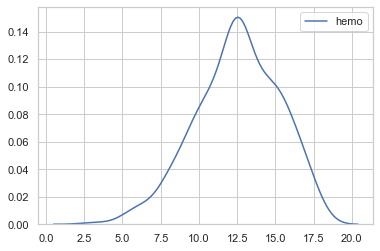

In [34]:
sns.kdeplot(dataset['hemo'])
plt.show()

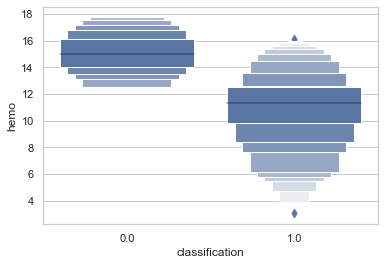

In [35]:
sns.boxenplot(x="classification", y="hemo",color="b",scale="linear", data=dataset)
plt.show()


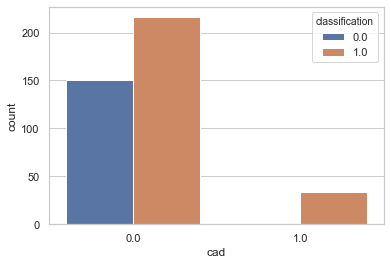

In [36]:
sns.countplot(dataset['cad'],hue=dataset['classification'])
plt.show()

In [37]:
pp = pd.crosstab(dataset["appet"],dataset["classification"])
scipy.stats.chi2_contingency(pp)

(59.890576264253205,
 1.0028045769048396e-14,
 1,
 array([[ 30.75,  51.25],
        [119.25, 198.75]]))

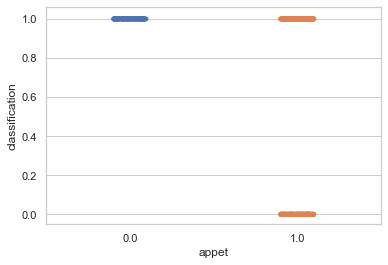

In [38]:
ax = sns.stripplot(x="appet", y="classification",data=dataset)

In [39]:
x=dataset.iloc[:,0:24]
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.000000,...,15.4,44.0,7800.0,5.200000,0.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,148.036517,...,11.3,38.0,6000.0,4.709259,1.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,9.6,31.0,7500.0,4.709259,2.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,11.2,32.0,6700.0,3.900000,3.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,11.6,35.0,7300.0,4.600000,4.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.000000,...,15.7,47.0,6700.0,4.900000,395.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.000000,...,16.5,54.0,7800.0,6.200000,396.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.000000,...,15.8,49.0,6600.0,5.400000,397.0,0.0,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.000000,...,14.2,51.0,7200.0,5.900000,398.0,0.0,0.0,1.0,0.0,0.0


In [40]:
y=dataset.iloc[:,24:]
y

,classification
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
395,0.0
396,0.0
397,0.0
398,0.0


# MODEL BUILDING:

In [41]:
x.shape

(400, 24)

In [42]:
y.shape


(400, 1)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
x_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
92,71.000000,70.0,1.010,3.0,0.0,1.0,0.0,1.0,1.0,219.000000,...,10.400000,33.000000,5600.000000,3.600000,92.0,1.0,1.0,1.0,0.0,0.0
223,71.000000,90.0,1.010,0.0,3.0,1.0,1.0,0.0,0.0,303.000000,...,13.000000,38.000000,9200.000000,4.600000,223.0,1.0,0.0,1.0,0.0,0.0
234,37.000000,100.0,1.010,0.0,0.0,0.0,1.0,0.0,0.0,148.036517,...,15.000000,44.000000,4100.000000,5.200000,234.0,0.0,0.0,1.0,0.0,0.0
232,50.000000,90.0,1.015,1.0,0.0,0.0,0.0,0.0,0.0,148.036517,...,12.526437,38.924242,8410.847458,4.709259,232.0,0.0,0.0,1.0,1.0,0.0
377,64.000000,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,97.000000,...,13.800000,49.000000,6400.000000,4.800000,377.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,43.000000,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,130.000000,...,15.900000,45.000000,7800.000000,4.500000,323.0,0.0,0.0,1.0,0.0,0.0
192,46.000000,110.0,1.015,0.0,0.0,1.0,1.0,0.0,0.0,130.000000,...,12.526437,38.924242,8410.847458,4.709259,192.0,0.0,0.0,1.0,0.0,0.0
117,51.483376,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,219.000000,...,12.500000,37.000000,9800.000000,4.400000,117.0,0.0,0.0,1.0,0.0,0.0
47,11.000000,80.0,1.010,3.0,0.0,1.0,1.0,0.0,0.0,148.036517,...,15.000000,45.000000,8600.000000,4.709259,47.0,0.0,0.0,1.0,0.0,0.0


In [46]:
y_train


,classification
92,1.0
223,1.0
234,1.0
232,1.0
377,0.0
...,...
323,0.0
192,1.0
117,1.0
47,1.0


In [47]:
x_train.shape

(280, 24)

In [48]:
y_train.shape

(280, 1)

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [50]:
x_test

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
132,50.0,76.469072,1.017408,1.016949,0.450142,1.0,1.0,0.0,0.0,219.0,...,8.6,24.0,13200.000000,2.700000,132.0,0.0,0.0,1.0,1.0,1.0
309,51.0,60.000000,1.020000,0.000000,0.000000,1.0,1.0,0.0,0.0,129.0,...,17.2,40.0,8100.000000,5.900000,309.0,0.0,0.0,1.0,0.0,0.0
341,63.0,70.000000,1.025000,0.000000,0.000000,1.0,1.0,0.0,0.0,130.0,...,13.4,41.0,7300.000000,4.700000,341.0,0.0,0.0,1.0,0.0,0.0
196,49.0,100.000000,1.010000,3.000000,0.000000,0.0,0.0,0.0,0.0,129.0,...,8.1,24.0,9600.000000,3.500000,196.0,1.0,0.0,0.0,1.0,1.0
246,48.0,110.000000,1.015000,3.000000,0.000000,0.0,1.0,1.0,0.0,106.0,...,8.6,26.0,5000.000000,2.500000,246.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,64.0,70.000000,1.010000,0.000000,0.000000,1.0,1.0,0.0,0.0,107.0,...,12.8,38.0,8410.847458,4.709259,216.0,0.0,0.0,1.0,0.0,0.0
259,35.0,80.000000,1.020000,0.000000,0.000000,1.0,1.0,0.0,0.0,104.0,...,16.1,45.0,4300.000000,5.200000,259.0,0.0,0.0,1.0,0.0,0.0
49,60.0,70.000000,1.010000,2.000000,0.000000,1.0,0.0,1.0,0.0,144.0,...,9.7,29.0,21600.000000,3.500000,49.0,1.0,0.0,0.0,0.0,1.0
238,72.0,100.000000,1.017408,1.016949,0.450142,1.0,1.0,0.0,0.0,201.0,...,9.4,28.0,8410.847458,4.709259,238.0,1.0,0.0,1.0,0.0,1.0


In [51]:
y_pred=dt.predict(x_test)
y_pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0.])

In [52]:
y_test

,classification
132,1.0
309,0.0
341,0.0
196,1.0
246,1.0
...,...
216,1.0
259,0.0
49,1.0
238,1.0


# Evaluation:

In [53]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test,y_pred)
a1

0.9916666666666667

In [54]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred)
cm

#[row, column]
#TP = confusion[1, 1]
#TN = confusion[0, 0]
#FP = confusion[0, 1]
#FN = confusion[1, 0]

array([[47,  1],
       [ 0, 72]], dtype=int64)

# In the above predicted confusion matrix,we notice that :
    47- True Negative (means patient doesnt have kidney disease)
    72 -True Positive (means patient has kidney disease)
     1 - False Positive (means patient is notckd but predicted as ckd)
     0 - False Negative (dangerous because affected patients predicted as notckd)

In [55]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.9791666666666666
Specificity :  1.0


In [56]:
from sklearn.metrics import precision_score
print("Precision: %f "%precision_score(y_test, y_pred))

from sklearn.metrics import recall_score
print("Recall: %f "%recall_score(y_test, y_pred))

from sklearn.metrics import f1_score
print("F1: %f"% f1_score(y_test, y_pred))


Precision: 0.986301 
Recall: 1.000000 
F1: 0.993103


In [57]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.98      0.99        48\n         1.0       0.99      1.00      0.99        72\n\n    accuracy                           0.99       120\n   macro avg       0.99      0.99      0.99       120\nweighted avg       0.99      0.99      0.99       120\n'

In [58]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc


0.9895833333333333

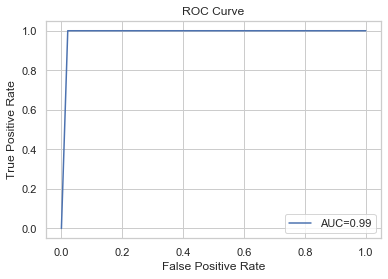

In [59]:
plt.plot(fpr,tpr,label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.title('ROC Curve')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.rcParams['font.size'] = 12
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)


# Naive Bayes Algorithm:

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [61]:
pipe=Pipeline([("sc",StandardScaler()),("classifier",
                                        GaussianNB())])
pipe.fit(x_train,y_train)

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [62]:
y_predict=pipe.predict(x_test)
y_predict

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0.])

In [63]:
from sklearn.metrics import accuracy_score
a2=accuracy_score(y_test,y_predict)
a2

0.9416666666666667

In [64]:
r1=metrics.roc_auc_score(y_test, y_predict)
r1

0.9513888888888888

In [65]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_predict)
cm1

#[row, column]
#TP = confusion[1, 1]
#TN = confusion[0, 0]
#FP = confusion[0, 1]
#FN = confusion[1, 0]


array([[48,  0],
       [ 7, 65]], dtype=int64)

In [66]:
from sklearn.metrics import precision_score
print("Precision: %f "%precision_score(y_test, y_predict))

from sklearn.metrics import recall_score
print("Recall: %f "%recall_score(y_test, y_predict))

from sklearn.metrics import f1_score
print("F1: %f"% f1_score(y_test, y_predict))


Precision: 1.000000 
Recall: 0.902778 
F1: 0.948905


In [67]:
total1=sum(sum(cm1))

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  1.0
Specificity :  0.9027777777777778


# KNN 

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [69]:
pipes=Pipeline([("sc",StandardScaler()),("classifier",KNeighborsClassifier(metric='minkowski'))])
pipes.fit(x_train,y_train)

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [70]:
y_preds=pipes.predict(x_test)
y_preds

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0.])

In [71]:
from sklearn.metrics import accuracy_score
a3=accuracy_score(y_test,y_preds)
a3

0.9916666666666667

In [72]:
from sklearn.metrics import precision_score
print("Precision: %f "%precision_score(y_test, y_preds))

from sklearn.metrics import recall_score
print("Recall: %f "%recall_score(y_test, y_preds))

from sklearn.metrics import f1_score
print("F1: %f"% f1_score(y_test, y_preds))

Precision: 1.000000 
Recall: 0.986111 
F1: 0.993007


In [73]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_preds)
cm2

#[row, column]
#TP = confusion[1, 1]
#TN = confusion[0, 0]
#FP = confusion[0, 1]
#FN = confusion[1, 0]



array([[48,  0],
       [ 1, 71]], dtype=int64)

# In the above predicted confusion matrix,we notice that :
    48- True Negative (means patient doesnt have kidney disease)
    71 -True Positive (means patient has kidney disease)
     0 - False Positive (means patient is notckd but predicted as ckd)
     1 - False Negative (dangerous because affected patients predicted as notckd)

In [74]:
total2=sum(sum(cm2))

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2)

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Sensitivity :  1.0
Specificity :  0.9861111111111112


# Adjusting the classification Threshold:

In [75]:
pipes.predict(x_test)[0:10]

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1.])

In [76]:
# print the first 10 predicted probabilities of class membership
pipes.predict_proba(x_test)[0:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [77]:
# print the first 10 predicted probabilities for class 1
pipes.predict_proba(x_test)[0:10, 1]

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1.])

In [78]:
# store the predicted probabilities for class 1
y_pred_prob = pipes.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Frequency')

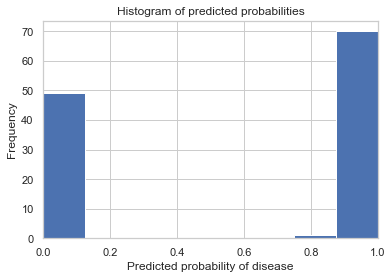

In [79]:
# adjust the font size 
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of disease')
plt.ylabel('Frequency')


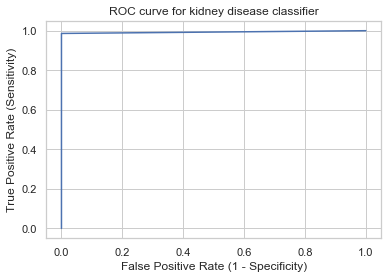

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for kidney disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [81]:
#first argument is true values, second argument is predicted probabilities
r2=metrics.roc_auc_score(y_test, y_pred_prob)
r2

0.9930555555555556

In [82]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_preds)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9930555555555556

# Pie Chart to Compare the three models:

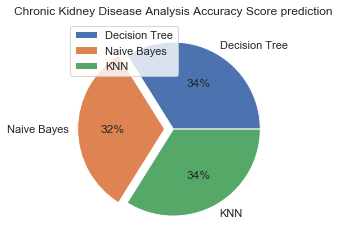

In [83]:
z=[a1,a2,a3]   #create a pie chart
label=['Decision Tree','Naive Bayes','KNN']
Explode=[0,0.1,0]

plt.pie(z,labels=label,explode=Explode,autopct='%1.0f%%')
plt.title("Chronic Kidney Disease Analysis Accuracy Score prediction")
plt.legend(title='ML models')
plt.legend(loc='upper left')
plt.show()

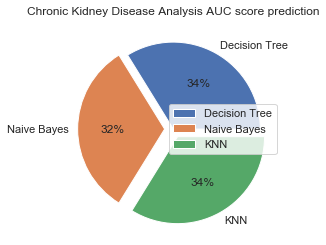

In [84]:
z=[roc_auc,r1,r2]   #create a pie chart
label=['Decision Tree','Naive Bayes','KNN']
Explode=[0,0.1,0.1]

plt.pie(z,labels=label,explode=Explode,autopct='%1.0f%%')
plt.title("Chronic Kidney Disease Analysis AUC score prediction")
plt.legend(title='ML models')
plt.legend(loc='center right')
plt.show()

# Sensitivity specificity plot:

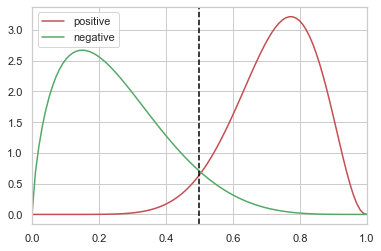

In [85]:
test_y = np.array([0]*100 + [1]*100)
predicted_y_probs = np.concatenate((np.random.beta(2,5,100), np.random.beta(8,3,100)))

def estimate_beta(X):
    xbar = np.mean(X)
    vbar = np.var(X,ddof=1)
    alphahat = xbar*(xbar*(1-xbar)/vbar - 1)
    betahat = (1-xbar)*(xbar*(1-xbar)/vbar - 1)
    return alphahat, betahat

positive_beta_estimates = estimate_beta(predicted_y_probs[test_y == 1])
negative_beta_estimates = estimate_beta(predicted_y_probs[test_y == 0])

unit_interval = np.linspace(0,1,100)
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *positive_beta_estimates), c='r', label="positive")
plt.plot(unit_interval, scipy.stats.beta.pdf(unit_interval, *negative_beta_estimates), c='g', label="negative")

# Show the threshold.
plt.axvline(0.5, c='black', ls='dashed')
plt.xlim(0,1)

# Add labels
plt.legend()

So looking at the three models, we will consider the final model which has greater accuracy score,better confusion matrix and a good AUC value.


# The Final model which is suitable to predict the disease is: Decision Tree with 99.17% accuracy score, 0 false negative in confusion matrix and 0.99 AUC score.
